In [3]:
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv("weatherHistory.csv")
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature (C),96453.0,11.932678,9.551546,-21.822222,4.688889,12.0000,18.838889,39.905556
Apparent Temperature (C),96453.0,10.855029,10.696847,-27.716667,2.311111,12.0000,18.838889,39.344444
Humidity,96453.0,0.734899,0.195473,0.000000,0.600000,0.7800,0.890000,1.000000
Wind Speed (km/h),96453.0,10.810640,6.913571,0.000000,5.828200,9.9659,14.135800,63.852600
Wind Bearing (degrees),96453.0,187.509232,107.383428,0.000000,116.000000,180.0000,290.000000,359.000000
Visibility (km),96453.0,10.347325,4.192123,0.000000,8.339800,10.0464,14.812000,16.100000
Loud Cover,96453.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
Pressure (millibars),96453.0,1003.235956,116.969906,0.000000,1011.900000,1016.4500,1021.090000,1046.380000


In [ ]:
df.isnull().values.any()

Sıcaklık ve Nemi karşılaştırmak istediğim için onlar üzeine odaklanacağım.

In [ ]:
df.isnull().values.any()

In [15]:
df["Temperature (C)"].isnull().values.any()

False

In [14]:
df["Humidity"].isnull().values.any()

False

In [7]:
df.corr()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
Temperature (C),1.000000,0.992629,-0.632255,0.008957,0.029988,0.392847,NaN,-0.005447
Apparent Temperature (C),0.992629,1.000000,-0.602571,-0.056650,0.029031,0.381718,NaN,-0.000219
Humidity,-0.632255,-0.602571,1.000000,-0.224951,0.000735,-0.369173,NaN,0.005454
Wind Speed (km/h),0.008957,-0.056650,-0.224951,1.000000,0.103822,0.100749,NaN,-0.049263
Wind Bearing (degrees),0.029988,0.029031,0.000735,0.103822,1.000000,0.047594,NaN,-0.011651
Visibility (km),0.392847,0.381718,-0.369173,0.100749,0.047594,1.000000,NaN,0.059818
Loud Cover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pressure (millibars),-0.005447,-0.000219,0.005454,-0.049263,-0.011651,0.059818,NaN,1.000000


In [25]:
X = df["Temperature (C)"][0:200]


In [22]:
y = df["Humidity"][0:200]

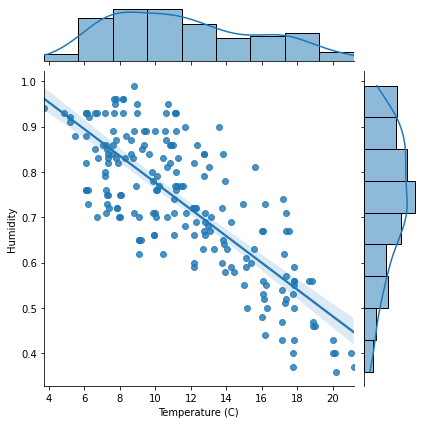

In [23]:
import seaborn as sns
sns.jointplot(x = X, y = y, data = df, kind = "reg");

basitçe : sıcaklık arttıkça nemin azaldığını  görebiliyoruz ve burada ters regresyon modeli ortaya çıkmış oluyor

In [24]:
import statsmodels.api as sm

In [27]:
y.head()

0    0.89
1    0.86
2    0.89
3    0.83
4    0.83
Name: Humidity, dtype: float64

In [26]:
X = sm.add_constant(X)
X.head()

,const,Temperature (C)
0,1.0,9.472222
1,1.0,9.355556
2,1.0,9.377778
3,1.0,8.288889
4,1.0,8.755556


In [28]:
lm = sm.OLS(y,X)

In [29]:
model = lm.fit()

In [30]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Humidity   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     324.5
Date:                Thu, 10 Jun 2021   Prob (F-statistic):           1.38e-43
Time:                        21:26:51   Log-Likelihood:                 192.44
No. Observations:                 200   AIC:                            -380.9
Df Residuals:                     198   BIC:                            -374.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.0709      0.020     53.507      0.000       1.031       1.110
Temperature (C)    -0.0294      0.002    -18.013      0.000      -0.033      -0.026
==============================================================================
Omnibus:                        8.080   Durbin-Watson:                   0.270
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                5.082
Skew:                           0.227   Prob(JB):                       0.0788
Kurtosis:                       2.365   Cond. No.                         37.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

anlamlı bir model

In [34]:
model.params

const              1.070870
Temperature (C)   -0.029445
dtype: float64

In [35]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,1.0709,0.020,53.507,0.000,1.031,1.110
Temperature (C),-0.0294,0.002,-18.013,0.000,-0.033,-0.026


In [36]:
model.conf_int()

,0,1
const,1.031403,1.110337
Temperature (C),-0.032669,-0.026221


In [37]:
model.f_pvalue

1.3753489150185158e-43

In [40]:
print("fvalue: ", "%.2f" % model.fvalue)

fvalue:  324.45


In [41]:
print("f_pvalue: ", "%.4f" % model.f_pvalue)

f_pvalue:  0.0000


In [38]:
print("tvalue: ", "%.2f" % model.tvalues[0:1])

tvalue:  53.51


In [39]:
model.rsquared_adj

0.6191041135027924

In [43]:
print("Humidity = " +  str("%.2f" % model.params[0]) + " + Temperature (C)" + "*" + str("%.2f" % model.params[1]))

Humidity = 1.07 + Temperature (C)*-0.03


In [51]:
X2= df["Temperature (C)"][0:200]
X2

0       9.472222
1       9.355556
2       9.377778
3       8.288889
4       8.755556
         ...    
195    10.577778
196    10.533333
197    10.588889
198     9.983333
199    11.022222
Name: Temperature (C), Length: 200, dtype: float64

In [59]:
y.max()

0.99

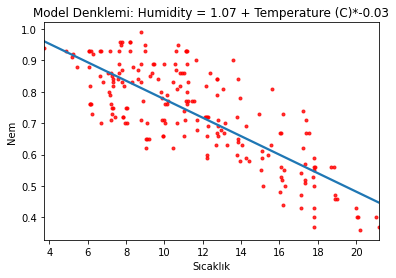

In [63]:
g = sns.regplot(X2, y, ci=None, scatter_kws={'color':'r', 's':9})
g.set_title("Model Denklemi: Humidity = 1.07 + Temperature (C)*-0.03")
g.set_ylabel("Nem")
g.set_xlabel("Sıcaklık")
import matplotlib.pyplot as plt


In [64]:
from sklearn.linear_model import LinearRegression

In [66]:
reg = LinearRegression()
model = reg.fit(X, y)
model.intercept_

1.0708699936449486

In [67]:
model.coef_

array([ 0.        , -0.02944507])

In [68]:
model.score(X,y)

0.6210181631836829

In [69]:
model.predict(X)[0:10]

array([0.79195972, 0.79539498, 0.79474065, 0.82680306, 0.81306203,
       0.79932099, 0.84316143, 0.81257128, 0.75220888, 0.66534591])

In [70]:
y[0:10]

0    0.89
1    0.86
2    0.89
3    0.83
4    0.83
5    0.85
6    0.95
7    0.89
8    0.82
9    0.72
Name: Humidity, dtype: float64